<a href="https://colab.research.google.com/github/ilirsheraj/AutoEncoders-GANs/blob/main/Chpt_01_Basics_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Coding a Perceptron

These exercises are taken from Michael Leaham's Book "Generating a New Reality"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
Y = np.array([0,1,1,0])
print(X.shape)
print(Y.shape)

(4, 2)
(4,)


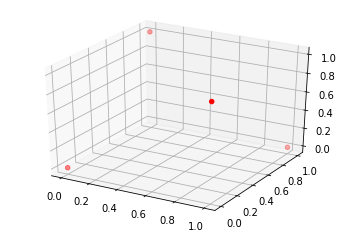

In [4]:
# Plot the whole thing
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], Y, X[:,1], c='r', marker='o')
plt.show()

In [5]:
# Initializ e the weights
no_of_inputs = X.shape[1]
weights = np.random.rand(no_of_inputs + 1)
print(weights)
print()
print(weights.shape)

[0.80373239 0.7231974  0.91315942]

(3,)


In [6]:
# Example of a working Perceptron
for i in range(len(X)):
    inputs = X[i]
    print(inputs)
    summation = np.dot(inputs, weights[1:]) + weights[0]
    print(summation)

[0 0]
0.8037323890680792
[0 1]
1.716891812909808
[1 0]
1.5269297860162176
[1 1]
2.4400892098579465


In [7]:
# Let's train a perceptron
learning_rate = 0.1
epochs = 100
history = []
for i in range(epochs):
    for inputs, label in zip(X,Y):
        prediction = np.dot(inputs, weights[1:]) + weights[0]
        loss = label - prediction
        history.append(loss*loss)
#        print("loss = {}".format(history[i]))
        weights[1:] += learning_rate*loss*inputs
        weights[0] += learning_rate*loss

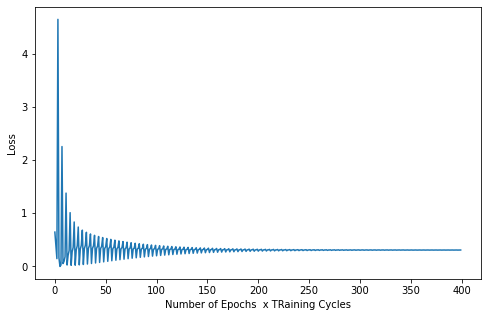

In [8]:
fig = plt.figure(figsize=(8,5))
plt.plot(history)
plt.xlabel("Number of Epochs  x TRaining Cycles")
plt.ylabel("Loss")
plt.show()

# Exercise 2: Linear Regression With Perceptron

In [9]:
X = np.array([[1,2,3], [3,4,5], [5,6,7], [7,8,9], [9,8,7]])
Y = np.array([1,2,3,4,5])

print(X.shape)
print(Y.shape)

(5, 3)
(5,)


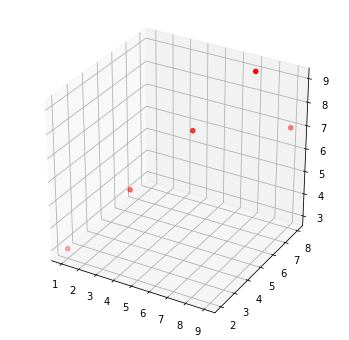

In [10]:
from matplotlib import projections
# Plot the whole thing
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], c = "r", marker="o")

In [11]:
number_of_inputs = X.shape[1]
epochs=50
learning_rate=0.01
weights=np.random.randn(number_of_inputs + 1)
print(weights)
print(weights.shape)

[-0.28039985  2.61603545  0.19160279 -0.78373932]
(4,)


In [12]:
# Define ReLU activation function
def relu_activation(sum):
    if sum > 0:
        return sum
    else:
        return 0

In [13]:
# Define a Perceptron Class
class Perceptron(object):
    def __init__(self, no_of_inputs, activation):
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.activation = activation

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(summation)

    def train(self, training_inputs, training_labels, epochs=100, learning_rate=0.01):
        history = []
        for _ in range(epochs):
            for inputs,label in zip(training_inputs, training_labels):
                prediction = self.predict(inputs)
                loss = (label - prediction)
                loss2 = loss*loss
                history.append(loss2)
                self.weights[1:] += self.learning_rate * loss * inputs
                self.weights[0] += self.learning_rate * loss
        return history

In [14]:
# Instantiate the class
perceptron = Perceptron(number_of_inputs, relu_activation)
history = perceptron.train(X,Y,epochs=epochs)

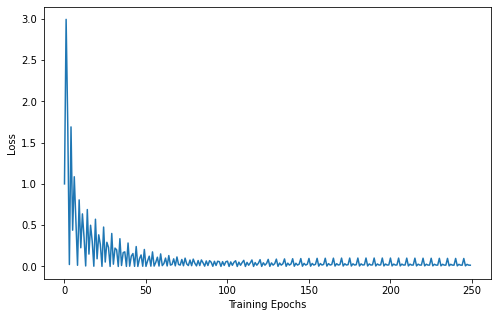

In [15]:
fig = plt.figure(figsize=(8,5))
plt.plot(history)
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.show()